### Descriptive Statistic

In [4]:
import pandas as pd

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Menambahkan 1 baris outlier ke dataframe
df.loc[len(df)] = [151, 20.0, 3.0, 4.0, 1.0, 'Iris-setosa']

# Menampilkan 5 data terakhir untuk cek apakah sudah masuk
print(df.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   
150  151           20.0           3.0            4.0           1.0   

            Species  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  
150     Iris-setosa  


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,5.937086,3.053642,3.760265,1.197351
std,43.734045,1.417162,0.432169,1.758639,0.760784
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.500000,5.100000,2.800000,1.600000,0.300000
50%,76.000000,5.800000,3.000000,4.300000,1.300000
75%,113.500000,6.400000,3.300000,5.100000,1.800000
max,151.000000,20.000000,4.400000,6.900000,2.500000


### Measure of Central Tendency

In [9]:
# Fungsi Mean Manual

def manual_mean(data):
    total = 0
    for i in data:
        total += i
    return total / len(data)

In [10]:
# Fungsi Median Manual

def manual_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    middle = n // 2

    if n % 2 == 0:  # Kalau jumlah data genap
        return (sorted_data[middle - 1] + sorted_data[middle]) / 2
    else:  # Kalau jumlah data ganjil
        return sorted_data[middle]

In [11]:
# Fungsi Modus Manual

def manual_mode(data):
    freq = {}
    for i in data:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1

    max_count = max(freq.values())
    modes = [key for key, value in freq.items() if value == max_count]

    if len(modes) == len(data):  # Kalau semua frekuensinya sama
        return None
    return modes

In [12]:
# EDA Central Tendency

def eda_central_tendency(df, column):
    data = df[column].tolist()

    mean = manual_mean(data)
    median = manual_median(data)
    mode = manual_mode(data)

    print(f"Mean dari {column}: {mean}")
    print(f"Median dari {column}: {median}")
    print(f"Mode dari {column}: {mode}")

eda_central_tendency(df, 'SepalLengthCm')


Mean dari SepalLengthCm: 5.937086092715234
Median dari SepalLengthCm: 5.8
Mode dari SepalLengthCm: [5.0]


### Measure of Dispersion

In [13]:
# Fungsi Range Manual

def manual_range(data):
    return max(data) - min(data)

In [14]:
# Fungsi IQR (Inter Quartile Range) Manual
# Rumus : Q3 - Q1

def manual_iqr(data):
    sorted_data = sorted(data)
    n = len(sorted_data)

    # Hitung Q1
    q1_index = n // 4
    q1 = sorted_data[q1_index]

    # Hitung Q3
    q3_index = (3 * n) // 4
    q3 = sorted_data[q3_index]

    iqr = q3 - q1
    return q1, q3, iqr

In [15]:
# Fungsi Variance Manual

def manual_variance(data):
    mean = manual_mean(data)
    squared_diffs = [(x - mean) ** 2 for x in data] #menghitung selisih setiap data dengan mean, lalu dikuadratkan.
    return sum(squared_diffs) / len(data) #menghitung rata-rata dari hasil kuadrat selisih tadi.

In [16]:
# Fungsi Standar Deviasi Manual
# Standar Deviasi = Akar dari variance

def manual_std_dev(data):
    # Varians dulu
    variance = manual_variance(data)
    
    # Akar kuadrat manual pakai pangkat 0.5
    std_dev = variance ** 0.5
    
    return std_dev

In [17]:
# Fungsi Manual Peak to Peak

def manual_ptp(data):
    max_value = max(data)
    min_value = min(data)
    ptp_value = max_value - min_value
    return ptp_value

In [22]:
# Fungsi mencari lower bound dan upper bound untuk deteksi outlier
# Lower Bound = Q1 - 1.5 * IQR
# Upper Bound = Q3 + 1.5 * IQR

def calculate_bounds(data):
    sorted_data = sorted(data)
    n = len(sorted_data)

    # Hitung IQR pakai fungsi manual
    q1, q3, iqr = manual_iqr(data)

    # Hitung lower dan upper bound
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr


    return lower_bound, upper_bound


In [24]:
# EDA Dispersion

# Misalnya kita ambil kolom SepalLengthCm
data = df['SepalLengthCm'].tolist()

# 1. Range
range_value = manual_range(data)
print(f'Range: {range_value}')

# 2. IQR
q1, q3, iqr_value = manual_iqr(data)
print(f'Q1: {q1}')
print(f'Q3: {q3}')
print(f'IQR: {iqr_value}')

# 3. Variance
variance_value = manual_variance(data)
print(f'Variance: {variance_value}')

# 4. Standard Deviation
std_dev_value = manual_std_dev(data)
print(f'Standard Deviation: {std_dev_value}')

# 5. Peak to Peak
ptp_value = manual_ptp(data)
print(f'PTP: {ptp_value}')

# 6. Lower bound & upper bound
lower_bound, upper_bound = calculate_bounds(data)
print(f'Lower Bound: {round(lower_bound)}')
print(f'Upper Bound: {round(upper_bound)}')

# 7. Outlier Detection
def detect_outliers_with_iqr(data):
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

outliers = detect_outliers_with_iqr(data)
print(f'Outliers: {outliers}')

Range: 15.7
Q1: 5.1
Q3: 6.4
IQR: 1.3000000000000007
Variance: 1.9950484627867202
Standard Deviation: 1.4124618447189008
PTP: 15.7
Lower Bound: 3
Upper Bound: 8
Outliers: [20.0]


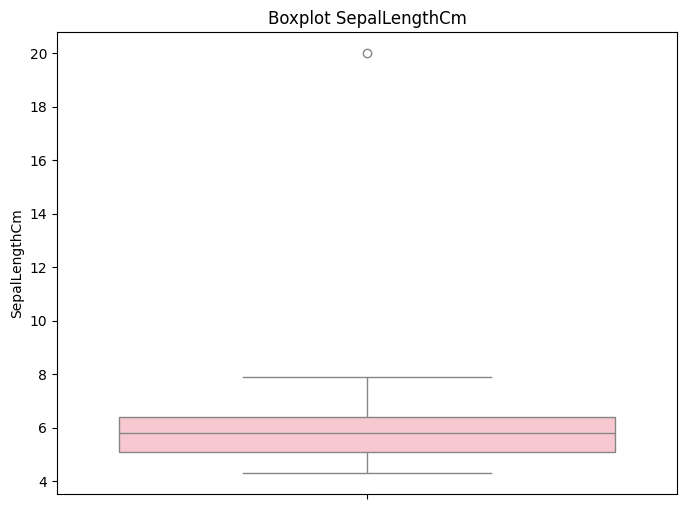

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(y=df['SepalLengthCm'], color='pink')
plt.title('Boxplot SepalLengthCm')
plt.ylabel('SepalLengthCm')
plt.show()

In [26]:
# Deteksi outlier
outliers = detect_outliers_with_iqr(df['SepalLengthCm'].tolist())

# Cari index dari semua outlier
outlier_indices = df[df['SepalLengthCm'].isin(outliers)].index.tolist()

# Tampilkan hasilnya
print(f'Outlier ditemukan di index: {outlier_indices}')

Outlier ditemukan di index: [150]


In [27]:
print(df.loc[150])

Id                       151
SepalLengthCm           20.0
SepalWidthCm             3.0
PetalLengthCm            4.0
PetalWidthCm             1.0
Species          Iris-setosa
Name: 150, dtype: object


In [28]:
# Drop row dengan index 150
df = df.drop(index=150)

# Reset index supaya rapi lagi
df = df.reset_index(drop=True)

# Cek hasilnya
print(df.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [29]:
outliers = detect_outliers_with_iqr(df['SepalLengthCm'].tolist())

# Cari semua index dari outliers yang ketemu
outlier_indices = df[df['SepalLengthCm'].isin(outliers)].index.tolist()

print(f'Outlier ditemukan di index: {outlier_indices}')

Outlier ditemukan di index: []


In [31]:
# EDA Central Tendency

def eda_central_tendency(df, column):
    data = df[column].tolist()

    # Hitung Mean, Median, Mode, Variance
    mean = manual_mean(data)
    median = manual_median(data)
    mode = manual_mode(data)
    variance_value = manual_variance(data)
    std_dev_value = manual_std_dev(data)
    ptp_value = manual_ptp(data)

    # Print hasil
    print(f"Mean dari {column}: {mean}")
    print(f"Median dari {column}: {median}")
    print(f"Mode dari {column}: {mode}")
    print(f'Variance: {variance_value}')
    print(f'Standard Deviation: {std_dev_value}')
    print(f'PTP: {ptp_value}')
    print(f'Q1: {q1}')
    print(f'Q3: {q3}')
    print(f'IQR: {iqr_value}')
    print(f'Lower Bound: {round(lower_bound)}')
    print(f'Upper Bound: {round(upper_bound)}')

# Panggil fungsi
eda_central_tendency(df, 'SepalLengthCm')

Mean dari SepalLengthCm: 5.843333333333335
Median dari SepalLengthCm: 5.8
Mode dari SepalLengthCm: [5.0]
Variance: 0.6811222222222223
Standard Deviation: 0.8253012917851409
PTP: 3.6000000000000005
Q1: 5.1
Q3: 6.4
IQR: 1.3000000000000007
Lower Bound: 3
Upper Bound: 8
